In [32]:
import pandas as pd

titanic_data_url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/refs/heads/main/Data/titanic.csv"
titanic_df = pd.read_csv(titanic_data_url)

### EDA (Exploratory Data Analysis)

In [33]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [35]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
passengers = len(titanic_df)
print(f"Total number of passengers: {passengers}")

Total number of passengers: 891


## Preparing the data

In [37]:
ta_df = titanic_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
ta_df.describe
ta_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [38]:
len(ta_df)

891

In [39]:
ta_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [40]:
#  keep the missing data for the investigation piece 
# ta_df.dropna(how = 'any', inplace = True)

In [41]:
len(ta_df)

891

In [42]:
passengers = len(ta_df)

In [43]:
ta_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [44]:
# one-hot encoding
ohe_labels = ["Sex"]
categorical_features = ta_df[ohe_labels]
categorical_features

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [45]:
categorical_features.shape

(891, 1)

In [46]:
from sklearn.preprocessing import OneHotEncoder

categorical_features.columns = categorical_features.columns.astype(str)
ohe = OneHotEncoder()
categorical_encoded = ohe.fit_transform(categorical_features)

# Create a DataFrame from the sparse matrix
x_cat = pd.DataFrame(
    categorical_encoded.toarray(),
    columns=ohe.get_feature_names_out(input_features=categorical_features.columns)
)

In [47]:
x_cat.head()

,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [48]:
ta_df = ta_df.drop(['Sex'], axis = "columns")

In [49]:
ta_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,1,3,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,0,3,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S
887,1,1,19.0,0,0,30.0000,S
888,0,3,NaN,1,2,23.4500,S
889,1,1,26.0,0,0,30.0000,C


In [50]:
ta_df = pd.concat([x_cat, ta_df], axis =1)

In [51]:
ta_df

,Sex_female,Sex_male,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0.0,1.0,0,3,22.0,1,0,7.2500,S
1,1.0,0.0,1,1,38.0,1,0,71.2833,C
2,1.0,0.0,1,3,26.0,0,0,7.9250,S
3,1.0,0.0,1,1,35.0,1,0,53.1000,S
4,0.0,1.0,0,3,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0,2,27.0,0,0,13.0000,S
887,1.0,0.0,1,1,19.0,0,0,30.0000,S
888,1.0,0.0,0,3,NaN,1,2,23.4500,S
889,0.0,1.0,1,1,26.0,0,0,30.0000,C


## Investigation

In [52]:
survived = ta_df['Survived'].sum()
print(f"Total number of passengers who survived: {survived}")

not_survived = passengers - survived
print(f"Total number of passengers who did not survive: {not_survived}")

#survived_percentage = (survived / passengers) * 100
survived_percentage = ta_df['Survived'].mean() * 100
print(f"Percentage of passengers who survived: {survived_percentage.round(2)}%")

Total number of passengers who survived: 342
Total number of passengers who did not survive: 549
Percentage of passengers who survived: 38.38%


In [57]:
# Calculate average fare for each passenger class
avg_fare_by_class = ta_df.groupby('Pclass')['Fare'].mean()
avg_fare_by_class

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

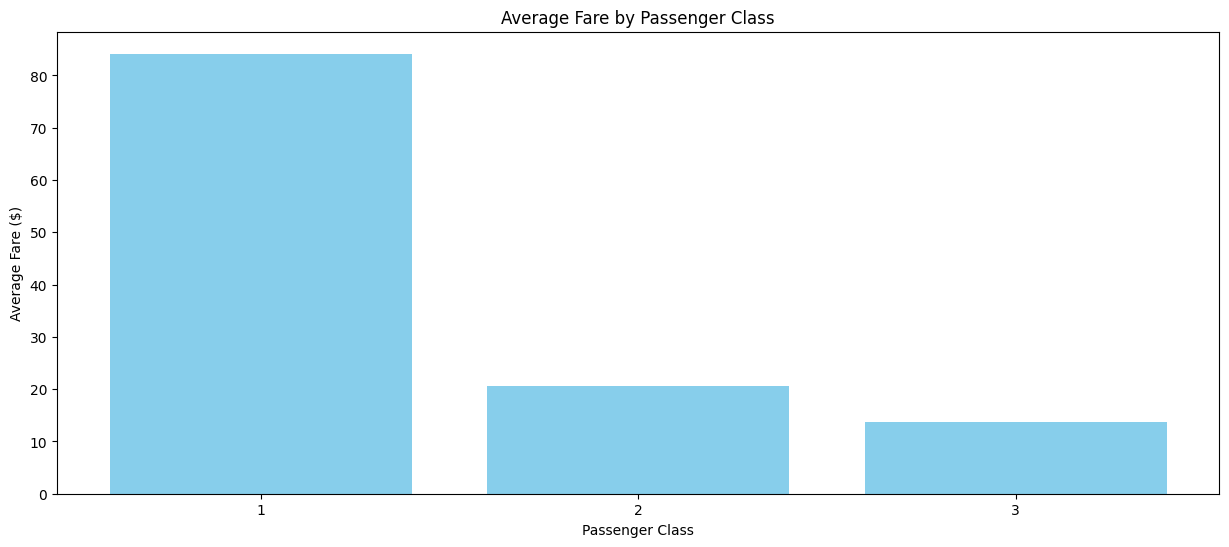

In [61]:
import matplotlib.pyplot as plt

# Plot the bar chart
plt.figure(figsize=(15, 6))
plt.bar(avg_fare_by_class.index, avg_fare_by_class.values, color='skyblue')
plt.title('Average Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare ($)')
plt.xticks(avg_fare_by_class.index)
plt.show()

In [53]:
first_class_passengers = sum(ta_df['Pclass'] == 1)
first_class_survived = sum((ta_df['Pclass'] == 1) & (ta_df['Survived'] == 1))

first_class_survived_percentage = (first_class_survived / first_class_passengers) * 100
print(f"Percentage of first-class passengers who survived: {round(first_class_survived_percentage, 2)}%")

Percentage of first-class passengers who survived: 62.96%


In [54]:
third_class_passengers = sum(ta_df['Pclass'] == 3)
third_class_survived = sum((ta_df['Pclass'] == 3) & (ta_df['Survived'] == 1))
third_class_survived_percentage = (third_class_survived / third_class_passengers) * 100
print(f"Percentage of third-class passengers who survived: {round(third_class_survived_percentage, 2)}%")

Percentage of third-class passengers who survived: 24.24%
